# Different estimates


## Dendritic Resistance

The impedance at the base of the spine depends both on the distance to the soma and the branching points that have occured from there.

$ R = \sum_i R_i$ 


In [1]:
from scipy.integrate import quad
from numpy import *
from matplotlib.pylab import *
%matplotlib inline

In [2]:
def R_coniccyl(L=1.0,D1=1,D2=1,Ri = 2.5,dl = 0.05):
    crsA = pi*( (D1+(D2-D1)*arange(0,L,dl))/2.0)**2
    R = 4.0*Ri*L/pi*quad(lambda x:1.0/(D1+(D2-D1)*x)**2,0,1)[0]
    return(R)

In [3]:
(R_coniccyl(50.0e-6,2e-6,1.3e-6)+R_coniccyl(50.0e-6,1.3e-6,1.0e-6)+R_coniccyl(150.0e-6,1.0e-6,1.0e-6))/1e6

661.1051482278729

In [4]:
def areabranch(dsp = 1.0, diam = 0.5, length = 10.0,diamNS = 0.15):
    cil_A = diam*pi*length
    sp_A = dsp*length*pi*(diamNS/2.0)**2
    return(cil_A-sp_A)

dsp = 1.0
length = 10.0
Ahead = 5.0
diamNS = 0.15
print("Area of dendritic shaft, spine head, spine neck")
print(areabranch(dsp),dsp*length*Ahead,diamNS*pi*1.5)

Area of dendritic shaft, spine head, spine neck
15.53124868118454 50.0 0.7068583470577035


In [5]:
lengths = [1,2,3,4,5,7.5,10.,15.,20,30.,40.,50.]
d = zeros((len(lengths),4))
for i,length in enumerate(lengths):
    d[i,:] = (length,areabranch(dsp,length=length),dsp*length*Ahead*.7,diamNS*pi*1.5)

In [6]:
#xkcd()

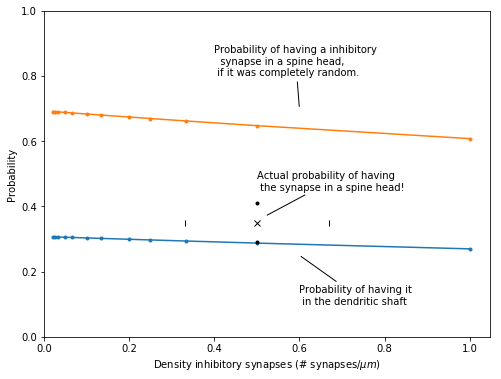

In [7]:
figure(figsize=(8,6))
plot(1.0/d[:,0],d[:,1]/d[:,1:].sum(axis=1),'.-',label='dendritic branch')
plot(1.0/d[:,0],d[:,2]/d[:,1:].sum(axis=1),'.-',label='spine head')
#legend()
xlabel("Density inhibitory synapses (# synapses/$\mu m$)")
ylabel("Probability")
plot(0.5,0.35,'kx')
plot(0.5-.17,0.35,'k|')
plot(0.5+.17,0.35,'k|')
plot(0.5,0.35-.06,'k.')
plot(0.5,0.35+.06,'k.')

annotate(
    'Actual probability of having\n the synapse in a spine head!',
    xy=(0.52, 0.37), arrowprops=dict(arrowstyle='-'), xytext=(0.5, 0.45))

annotate(
    'Probability of having it\n in the dendritic shaft',
   xy=(0.6, 0.25), arrowprops=dict(arrowstyle='-'),xytext=(0.6, 0.1) )


annotate(
    'Probability of having a inhibitory\n  synapse in a spine head, \n if it was completely random.',
     xy=(0.6, 0.7), arrowprops=dict(arrowstyle='-'), xytext=(0.4, 0.8))

xlim(0,)
ylim(0,1)

savefig("Prob_being_spinehead.png")

In [8]:
dd  = 1.0*d

In [9]:
ds = 1.0/array(lengths)
bs = zeros((len(ds),2))
for k,d in enumerate(ds): 
    length = 10.0
    Ab0 = areabranch(d,length=length)

    Asyn = 0.2

    pt = zeros(10000)
    for i in range(10000):
        nspines = int(-log(rand())*1.0*length)+1
        As0 = nspines*(Ahead*.7)
        An0 = nspines*diamNS*pi*1.5
        Ab = Ab0*1.0
        As = As0*1.0
        An = An0*1.0
        nsyn = int(-log(rand())*(length*d))+1
        sinS = 0.0
        for j in range(nsyn):
            At = Ab+As+An
            if rand()<(As+An)/At:
                sinS +=1.0
                As = As-Ahead*.7
                An = An-diamNS*pi*1.5
            else:
                Ab = Ab-Asyn
        pt[i] = sinS/float(nsyn)
    bs[k,:] = [mean(pt),std(pt)]

In [10]:
length*d

0.2

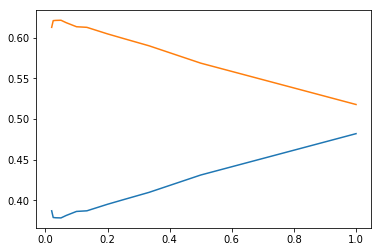

In [11]:
plot(ds,1-bs[:,0])
plot(ds,bs[:,0])
#plot(ds,bs2[:,0])

#plot(ds,1-bs2[:,0])


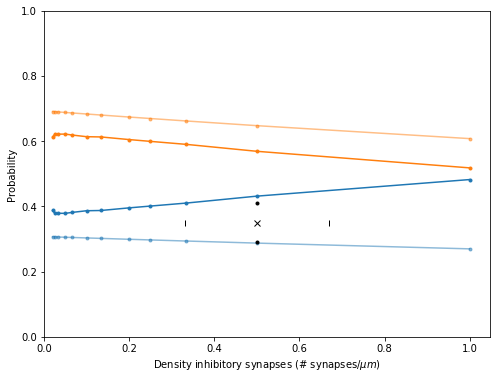

In [12]:
figure(figsize=(8,6))
plot(1.0/dd[:,0],dd[:,1]/dd[:,1:].sum(axis=1),'.-',label='dendritic branch',alpha=0.5)
plot(1.0/dd[:,0],dd[:,2]/dd[:,1:].sum(axis=1),'.-',label='spine head',alpha=0.5)
plot(ds,1-bs[:,0],'C0.-')
plot(ds,bs[:,0],'C1.-')
#legend()
xlabel("Density inhibitory synapses (# synapses/$\mu m$)")
ylabel("Probability")
plot(0.5,0.35,'kx')
plot(0.5-.17,0.35,'k|')
plot(0.5+.17,0.35,'k|')
plot(0.5,0.35-.06,'k.')
plot(0.5,0.35+.06,'k.')


xlim(0,)
ylim(0,1)

savefig("Prob_being_spineheadBs.png")

In [ ]:
nshPSD = 61
nDiS = 34
Ldd = 229.4670
dshPSD = (nshPSD/Ldd,sqrt(nshPSD)/Ldd)

In [ ]:
300*